In [22]:
import kagglehub
syedhaideralizaidi_black_friday_dataset_path = kagglehub.dataset_download('syedhaideralizaidi/black-friday-dataset')
print('Data source import complete.')

Using Colab cache for faster access to the 'black-friday-dataset' dataset.
Data source import complete.


In [23]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/black-friday-dataset/Black Friday Dataset.csv


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [25]:
df = pd.read_csv("/kaggle/input/black-friday-dataset/Black Friday Dataset.csv")

In [26]:
df.shape

(550068, 12)

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [29]:
purchase = np.array(df["Purchase"])

In [30]:
print("Purchase column")
print("Mean: ",np.mean(purchase))
print("Maximum value: ",np.max(purchase))
print("Minimum value: ",np.min(purchase))


Purchase column
Mean:  9263.968712959126
Maximum value:  23961
Minimum value:  12


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [32]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [33]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage")
missing_percentage

Missing values percentage


,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


In [34]:
df.duplicated().sum() #duplicate row count

np.int64(0)

In [35]:
df.describe() #statistical summary

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [36]:
df.describe(include='object') #categorical columns summary

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [39]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)

/tmp/ipython-input-1452075046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)


In [40]:
df['Product_Category_3'].fillna(0, inplace=True)

/tmp/ipython-input-2590852447.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_3'].fillna(0, inplace=True)


In [41]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


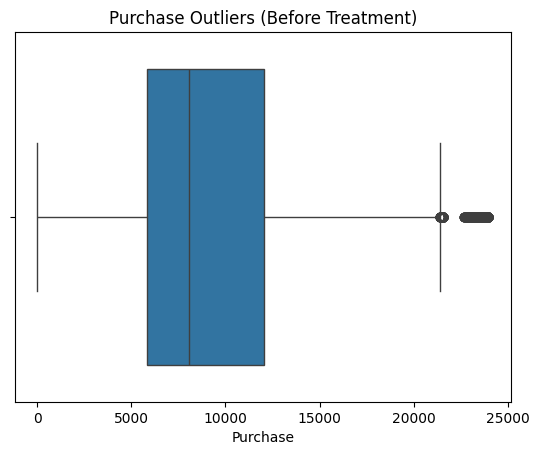

In [42]:
plt.figure()
sns.boxplot(x=df['Purchase'])
plt.title("Purchase Outliers (Before Treatment)")
plt.show()

In [43]:
df['Zscore'] = zscore(df['Purchase'])

outliers = df[np.abs(df['Zscore']) > 3]
print("\nNumber of Outliers Found:", outliers.shape[0])


Number of Outliers Found: 0


In [44]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_outliers = df[(df['Purchase'] < lower) | (df['Purchase'] > upper)]
print("IQR Outliers:", len(iqr_outliers))

IQR Outliers: 2677


In [45]:
df['Purchase'] = np.where(df['Purchase'] > upper, upper, df['Purchase'])
df['Purchase'] = np.where(df['Purchase'] < lower, lower, df['Purchase'])

In [46]:
df.drop(columns=['Zscore'], inplace=True)

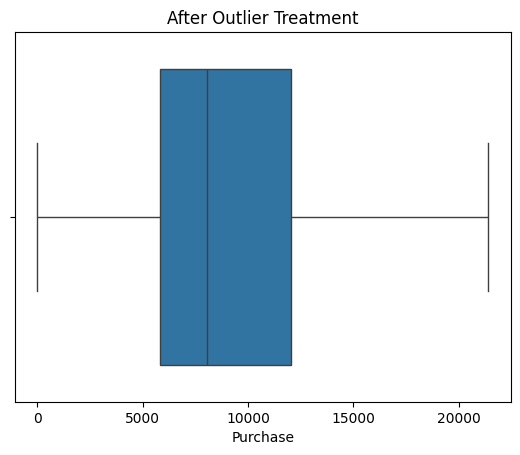

In [47]:
plt.figure()
sns.boxplot(x=df['Purchase'])
plt.title("After Outlier Treatment")
plt.show()

In [48]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
